# Physique : MP : Exercice 1 : Calcul de la reponse indicielle de filtres

- author : Sylvie Dagoret-Campagne
- afflilation : LAL/IJCLab, CNRS
- creation date : September 6 th 2020
- update : 
 

In [345]:
import os
import re
import numpy as np

In [346]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # vary depending on your lang/locale

'en_US.UTF-8'

In [347]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx

In [348]:
import numpy as np
import re
import time
from datetime import datetime,date
import dateutil.parser

In [349]:
from scipy import signal

In [350]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(8,4)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

# Start

In [351]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [352]:
Omega = np.logspace(-3,3,100,base=10)

# Systemes du premier ordre

## Filtre passe bas

$$
H(p) = \frac{1}{ap + b}
$$

In [353]:
lti = signal.lti([1.0], [1.0, 1.0])

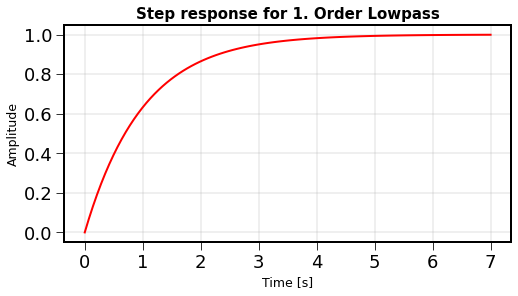

In [354]:
t, y = signal.step2(lti)
plt.plot(t, y,"r-")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order Lowpass')
plt.grid()

In [355]:
w, mag, phase = signal.bode(lti,w=Omega)

/Users/dagoret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


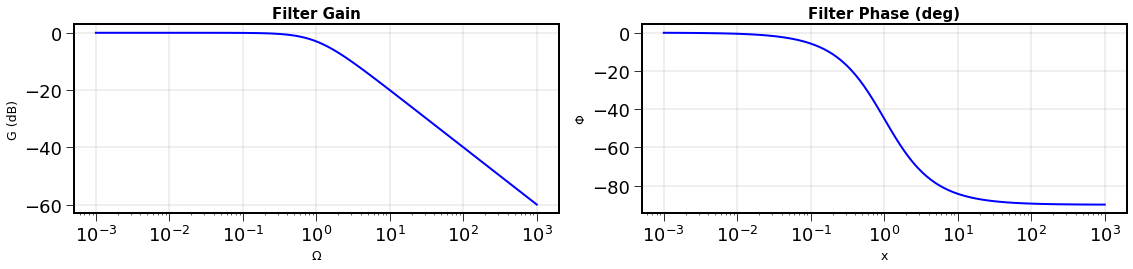

In [356]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(121)
plt.semilogx(w, mag,"b")    # Bode magnitude plot
plt.grid()
plt.xlabel("$\Omega$")
plt.ylabel("G (dB)")
plt.title("Filter Gain")

ax=fig.add_subplot(122)
ax=fig.add_subplot(122)
plt.semilogx(w, phase,"b")  # Bode phase plot
plt.grid()
plt.xlabel("x")
plt.ylabel("$\\Phi$")
plt.title("Filter Phase (deg)")

plt.tight_layout()
plt.show()

## Filtre passe haut

$$
H(p) = \frac{p}{ap+b}
$$

In [357]:
lti = signal.lti([1.0,0], [1.0, 1.0])

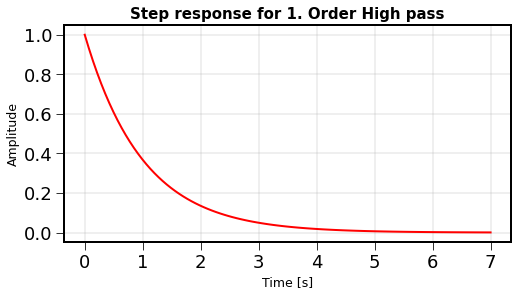

In [358]:
t, y = signal.step2(lti)
plt.plot(t, y,"r-")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 1. Order High pass')
plt.grid()

In [359]:
w, mag, phase = signal.bode(lti,w=Omega)

/Users/dagoret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


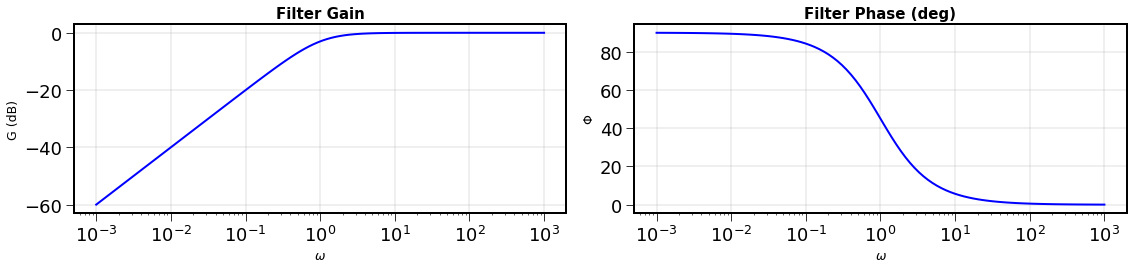

In [360]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(121)
plt.semilogx(w, mag,"b")    # Bode magnitude plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("G (dB)")
plt.title("Filter Gain")

ax=fig.add_subplot(122)
ax=fig.add_subplot(122)
plt.semilogx(w, phase,"b")  # Bode phase plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("$\\Phi$")
plt.title("Filter Phase (deg)")

plt.tight_layout()
plt.show()

# Systemes du second ordre

## systemes du second ordre passe bas

### Passe bas 1

$$
H(p) = \frac{1}{ap^2+bp+c}
$$

In [361]:
lti = signal.lti([1.0], [1.0, 1.0,1.0])

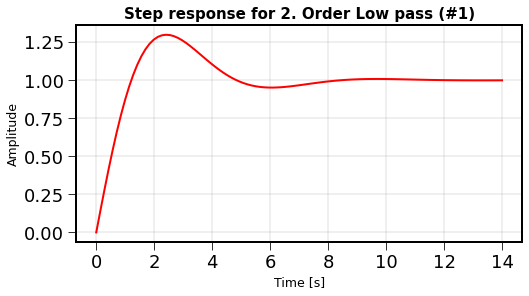

In [384]:
t, y = signal.step2(lti)
plt.plot(t, y,"r-")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 2. Order Low pass (#1)')
plt.grid()

In [363]:
w, mag, phase = signal.bode(lti,w=Omega)

/Users/dagoret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


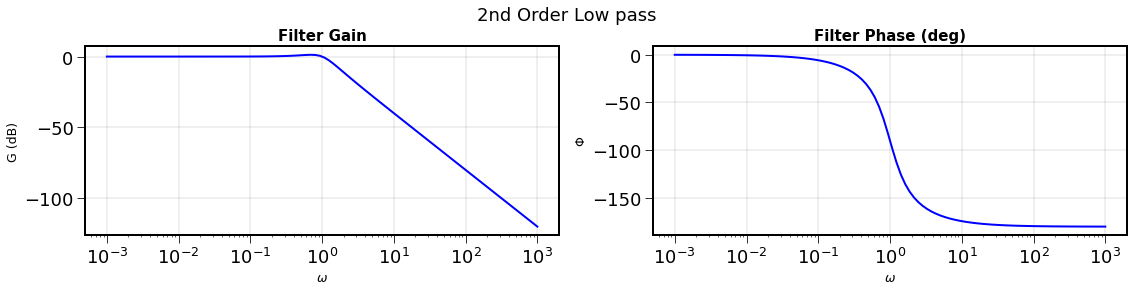

In [364]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(121)
plt.semilogx(w, mag,"b")    # Bode magnitude plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("G (dB)")
plt.title("Filter Gain")

ax=fig.add_subplot(122)
ax=fig.add_subplot(122)
plt.semilogx(w, phase,"b")  # Bode phase plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("$\\Phi$")
plt.title("Filter Phase (deg)")
plt.suptitle('2nd Order Low pass',Y=1.02)
plt.tight_layout()
plt.show()

### Passe bas 2

$$
H(p) = \frac{dp+e}{ap^2+bp+c}
$$

In [382]:
lti = signal.lti([1.0,1.0], [1.0, 1.0,1.0])

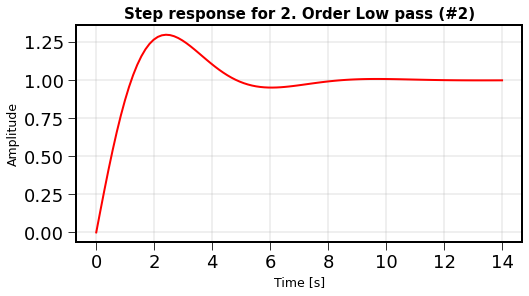

In [385]:
t, y = signal.step2(lti)
plt.plot(t, y,"r-")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 2. Order Low pass (#2)')
plt.grid()

## systemes du second ordre passe haut

$$
H(p) = \frac{dp^2+ep+f}{ap^2+bp+c}
$$

In [386]:
lti = signal.lti([1.0,2.0,.0], [1.0, 1.0,1.0])

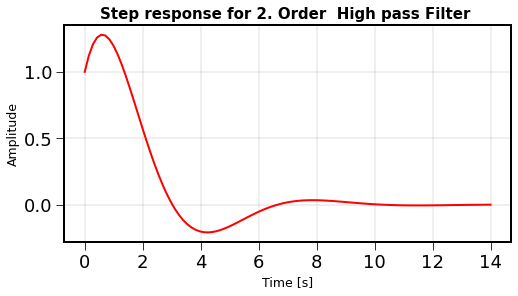

In [390]:
t, y = signal.step2(lti)
plt.plot(t, y,"r-")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 2. Order  High pass Filter ')
plt.grid()

In [391]:
w, mag, phase = signal.bode(lti,w=Omega)

In [ ]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(121)
plt.semilogx(w, mag,"b")    # Bode magnitude plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("G (dB)")
plt.title("Filter Gain")

ax=fig.add_subplot(122)
ax=fig.add_subplot(122)
plt.semilogx(w, phase,"b")  # Bode phase plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("$\\Phi$")
plt.title("Filter Phase (deg)")
plt.suptitle('2nd Order pass band',Y=1.02)
plt.tight_layout()
plt.show()

/Users/dagoret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


## systemes du second ordre passe haut

$$
H(p) = \frac{p^2}{ap^2+bp+c}
$$

In [369]:
lti = signal.lti([1,.0,0], [1.0, 1.0,1.0])

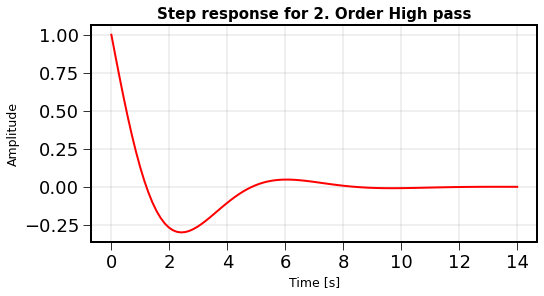

In [370]:
t, y = signal.step2(lti)
plt.plot(t, y,"r-")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 2. Order High pass')
plt.grid()

In [371]:
w, mag, phase = signal.bode(lti,w=Omega)

/Users/dagoret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


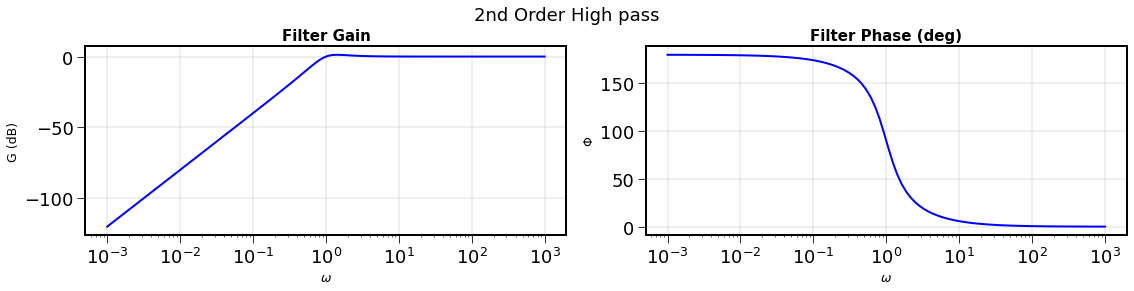

In [372]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(121)
plt.semilogx(w, mag,"b")    # Bode magnitude plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("G (dB)")
plt.title("Filter Gain")

ax=fig.add_subplot(122)
ax=fig.add_subplot(122)
plt.semilogx(w, phase,"b")  # Bode phase plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("$\\Phi$")
plt.title("Filter Phase (deg)")
plt.suptitle('2nd Order High pass',Y=1.02)
plt.tight_layout()
plt.show()

## systemes du second ordre passe haut

$$
H(p) = \frac{dp^2+ep}{ap^2+bp+c}
$$

In [373]:
lti = signal.lti([1,1,0], [1.0, 1.0,1.0])

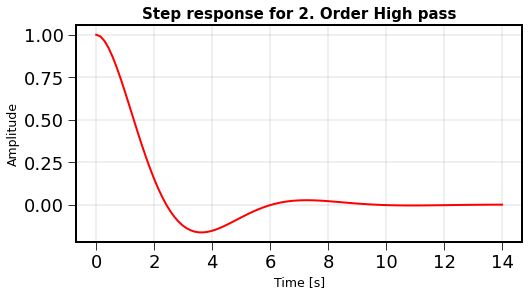

In [374]:
t, y = signal.step2(lti)
plt.plot(t, y,"r-")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 2. Order High pass')
plt.grid()

In [375]:
w, mag, phase = signal.bode(lti,w=Omega)

/Users/dagoret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


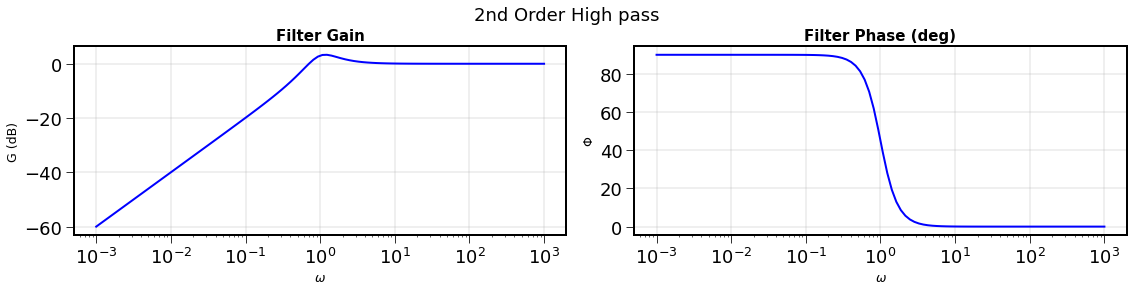

In [376]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(121)
plt.semilogx(w, mag,"b")    # Bode magnitude plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("G (dB)")
plt.title("Filter Gain")

ax=fig.add_subplot(122)
ax=fig.add_subplot(122)
plt.semilogx(w, phase,"b")  # Bode phase plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("$\\Phi$")
plt.title("Filter Phase (deg)")
plt.suptitle('2nd Order High pass',Y=1.02)
plt.tight_layout()
plt.show()

## Second ordre pass bande

$$
H(p) = \frac{p}{ap^2+bp+c}
$$

In [377]:
lti = signal.lti([0,1,0], [1.0, 1.0,1.0])

/Users/dagoret/anaconda3/lib/python3.7/site-packages/scipy/signal/filter_design.py:1626: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


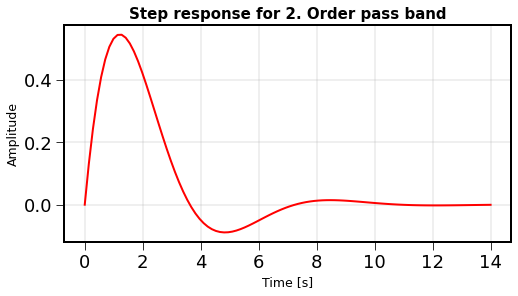

In [378]:
t, y = signal.step2(lti)
plt.plot(t, y,"r-")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Step response for 2. Order pass band')
plt.grid()

In [379]:
w, mag, phase = signal.bode(lti,w=Omega)

/Users/dagoret/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


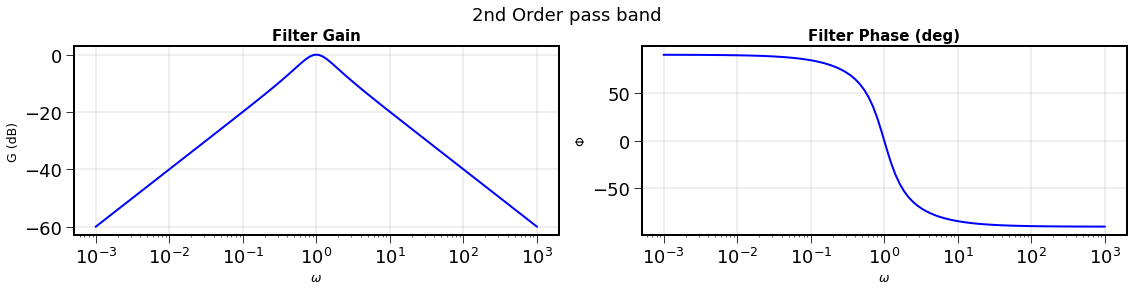

In [380]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_subplot(121)
plt.semilogx(w, mag,"b")    # Bode magnitude plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("G (dB)")
plt.title("Filter Gain")

ax=fig.add_subplot(122)
ax=fig.add_subplot(122)
plt.semilogx(w, phase,"b")  # Bode phase plot
plt.grid()
plt.xlabel("$\omega$")
plt.ylabel("$\\Phi$")
plt.title("Filter Phase (deg)")
plt.suptitle('2nd Order pass band',Y=1.02)
plt.tight_layout()
plt.show()